# Crop recommendation system

In [1]:
import numpy as np
import pandas as pd

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,Nitrogen,Potassium,Phosphorus,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.shape

(2200, 8)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Potassium    2200 non-null   int64  
 2   Phosphorus   2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.isnull().sum()

Nitrogen       0
Potassium      0
Phosphorus     0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crop.duplicated().sum()

0

In [7]:
crop.describe()

,Nitrogen,Potassium,Phosphorus,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
corr = crop.corr() # correlations finding itselfs
corr

C:\Users\DELL\AppData\Local\Temp\ipykernel_2096\54757446.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = crop.corr() # correlations finding itselfs


,Nitrogen,Potassium,Phosphorus,temperature,humidity,ph,rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Potassium,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Phosphorus,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

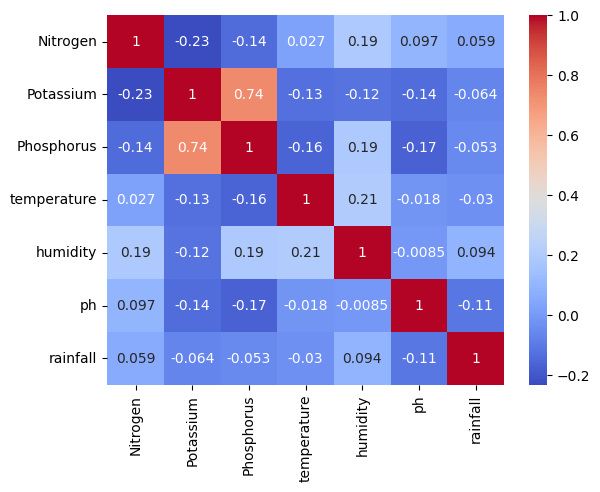

In [9]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [10]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Encoding

In [11]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [12]:
crop['crop_num'].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [13]:
crop.head()

,Nitrogen,Potassium,Phosphorus,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


# Train Test Split

In [14]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [15]:
X

,Nitrogen,Potassium,Phosphorus,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [16]:
X.shape

(2200, 7)

In [17]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [18]:
y.shape

(2200,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(1760, 7)

In [21]:
X_test.shape

(440, 7)

In [22]:
y_train.shape

(1760,)

In [23]:
y_test.shape

(440,)

In [24]:
X_train

,Nitrogen,Potassium,Phosphorus,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [25]:
X_test

,Nitrogen,Potassium,Phosphorus,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [26]:
y_train

1656     7
752     16
892     15
1041    13
1179    12
        ..
1638     7
1095    13
1130    12
1294    11
860     15
Name: crop_num, Length: 1760, dtype: int64

In [27]:
y_test

1451     9
1334    10
1761     6
1735     6
1576     8
        ..
59       1
71       1
1908     4
1958     4
482     19
Name: crop_num, Length: 440, dtype: int64

# LinearRegression

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([ 8.32367328,  8.97161787,  9.44880471,  9.71341545,  7.8751602 ,
       15.74126102,  7.34137923, 15.81924564, 10.94601887, 14.12649853,
       14.64578318,  7.17641563,  9.06772235,  8.04305552,  7.75011387,
        8.27120562,  8.61249207, 10.37753593,  5.40714346,  8.68332849,
       11.91966798,  9.95241426,  6.7815038 ,  6.4557687 , 21.22357781,
        6.90301261, 11.04950467,  8.56937738, 10.86915189,  5.65050531,
        9.04907641, 16.68131169,  8.15894025, 14.58023819,  8.17561653,
       14.50063147,  5.60916462, 21.49834793, 21.97697495, 21.52006677,
        4.67210502, 16.45598953, 15.4025086 , 13.12484132, 12.73564037,
       12.78888721, 14.4048102 ,  5.9795092 ,  9.19940303, 11.30889619,
       16.28941634, 12.22123101, 11.73471946, 12.1734571 , 10.61798663,
       19.7648262 ,  8.11326872,  8.03092903,  8.34614196, 15.23135593,
        7.85896945,  8.64209161, 14.87518855,  7.57995971,  9.99017055,
       13.71414333, 11.00107824,  2.70529092,  9.77461503, 13.64

In [29]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of linear regression is " + str(mae))

Mean Absolute Error of linear regression is 3.282938340450847


# LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 9, 10,  6,  6,  8, 12,  8, 18, 17, 15, 16,  5, 14,  3,  5, 14,  8,
        4,  6,  9, 22,  6,  7,  6, 21,  3, 17,  7, 19,  1, 14, 18,  3, 15,
        3, 16,  3, 21, 21, 20,  6, 12, 16,  2, 17,  2, 19,  5,  9,  2, 18,
       22, 11, 17, 22, 20,  4,  8, 13, 15, 10,  5, 15,  7,  6, 16,  7,  1,
        9, 19,  9,  5,  3, 13, 16,  6, 13,  4, 10,  7, 22, 21,  1, 18,  7,
       12, 22, 18, 16, 14,  2, 18,  4,  6, 19, 18, 20, 22, 16, 15,  5,  1,
        7,  9, 10, 20, 10, 13, 19, 18, 13,  3,  4, 14, 19, 21,  2,  5, 14,
        1, 19, 11, 16,  5, 21, 18,  5,  2, 13, 18, 13, 20, 14, 21,  5,  7,
       19, 13, 13,  8, 20,  9, 17, 18,  5,  2,  8,  5, 20, 18, 17, 15, 10,
       17, 16, 19, 19, 20,  2,  3, 21,  8,  7,  4,  1,  5, 11, 15, 10, 11,
       11, 16, 14, 21,  5,  2, 15, 11, 10,  3, 22, 22, 20,  3, 18, 20, 13,
       19,  5,  6,  6, 17, 12, 14, 10, 20,  2,  8, 16, 21, 11, 11, 13,  4,
        1, 14, 17, 13,  3, 17,  2, 21, 21, 21,  8,  1, 20,  6, 22, 16, 20,
       12, 12,  5,  6,  8

In [31]:
# Accuracy:- In your case, the accuracy of the logistic regression model is approximately 94.55%. This means that around 94.55% 
# of the instances in your test set were predicted correctly by the model.

from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression is " + str(logistic_acc))

Accuracy of logistic regression is 0.9454545454545454


In [32]:
# Mean Absolute Error (MAE):
# MAE measures the average absolute difference between the predicted values and the actual values.
# In your case, the MAE of the logistic regression model is approximately 0.184. This means that, on average, 
# the absolute difference between the predicted outcome and the actual outcome is around 0.184.

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of logistic regression is " + str(mae))

Mean Absolute Error of logistic regression is 0.18409090909090908


# Scale the features using MinMaxScaler

In [33]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [34]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standarization

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [36]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth = 6, random_state = 2)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
decision_acc = accuracy_score(y_test, y_pred_2)
print("Accuracy of decision  tree is " + str(decision_acc))

Accuracy of decision  tree is 0.9522727272727273


In [38]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators = 25, random_state=2)
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)
random_fore_acc = accuracy_score(y_test, y_pred_4)
print("Accuracy of Random Forest is " + str(random_fore_acc))

Accuracy of Random Forest is 0.9931818181818182


In [39]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

# Save Model To a File Using Python Pickle

In [60]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

In [73]:
crop_dict = {
            1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
            8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
            14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
            19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
        }

with open('standscaler.pkl', 'rb') as file:  
    Pickled_Model = pickle.load(file)

# Assuming 'rfc' is the model you want to use
arr = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]

predictions = rfc.predict(Pickled_Model.transform(arr))
predicted_crop = crop_dict[predictions[0]]
print("According to your soil neutrients You Should Grow ->:", predicted_crop)

According to your soil neutrients You Should Grow ->: Apple


# Save Model To a File Using Python joblib

In [41]:
import joblib

In [42]:
file_name = "crop_app"

In [43]:
joblib.dump(rfc,'crop_app')

['crop_app']

In [44]:
app = joblib.load('crop_app')

In [67]:
arr = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]
acc = app.predict(arr)
crop_recomm = crop_dict[acc[0]]

In [74]:
print("According to your soil neutrients You Should Grow ->:",crop_recomm)

According to your soil neutrients You Should Grow ->: Apple
